In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving img1.jfif to img1 (1).jfif


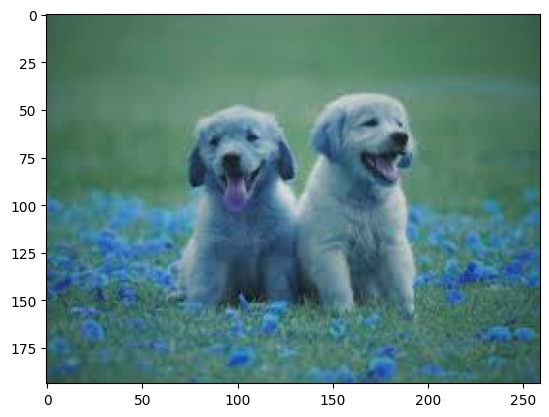

In [ ]:
img = cv2.imread('img1.jfif')
plt.imshow(img)

Resized Dimensions:  (200, 300, 3)


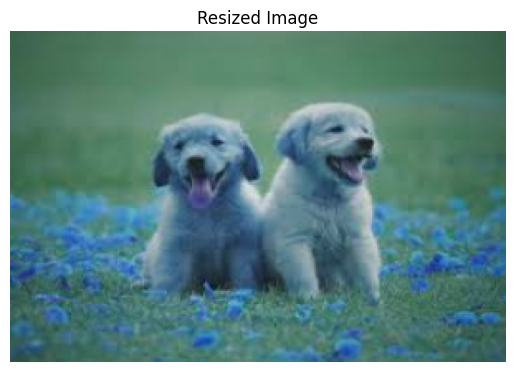

In [ ]:
width = 300
height = 200
dim = (width,height)

resized = cv2.resize (img,dim,interpolation = cv2.INTER_AREA)
print("Resized Dimensions: ",resized.shape)

plt.imshow(resized)
plt.title('Resized Image')
plt.axis("off")
plt.show()

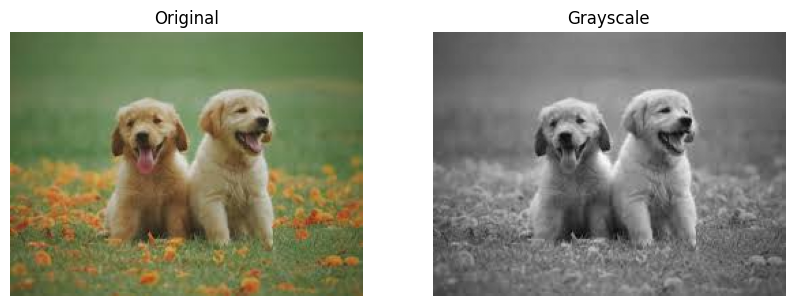

In [ ]:
image_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

grayscale = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.imshow(image_rgb)
plt.title("Original")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(grayscale, cmap="gray")
plt.title("Grayscale")
plt.axis("off")

plt.show()


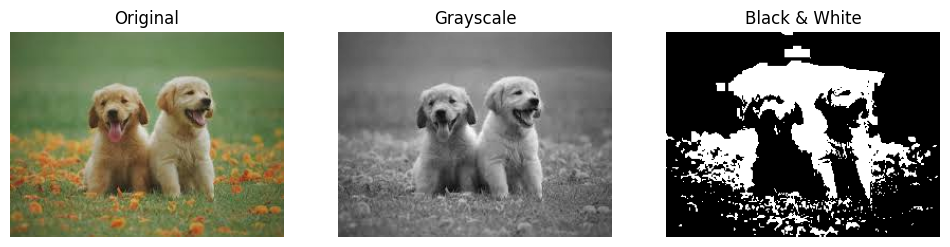

In [ ]:
_, bw = cv2.threshold(grayscale, 127, 255, cv2.THRESH_BINARY)

plt.figure(figsize=(12,6))


plt.subplot(1,3,1)
plt.imshow(image_rgb)
plt.title("Original")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(grayscale, cmap="gray")
plt.title("Grayscale")
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(bw, cmap="gray")
plt.title("Black & White")
plt.axis("off")

plt.show()


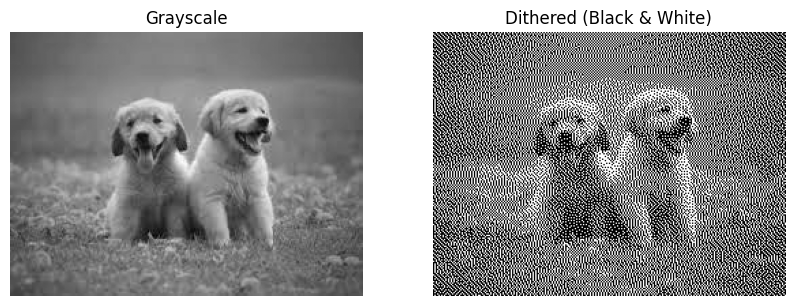

In [ ]:
dithered = grayscale.astype(np.float32)

rows, cols = dithered.shape
for y in range(rows):
    for x in range(cols):
        old_pixel = dithered[y, x]
        new_pixel = 0 if old_pixel < 128 else 255
        dithered[y, x] = new_pixel
        error = old_pixel - new_pixel

        if x + 1 < cols:
            dithered[y, x+1] += error * 7/16
        if y + 1 < rows:
            if x > 0:
                dithered[y+1, x-1] += error * 3/16
            dithered[y+1, x] += error * 5/16
            if x + 1 < cols:
                dithered[y+1, x+1] += error * 1/16

dithered = np.clip(dithered, 0, 255).astype(np.uint8)

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.imshow(grayscale, cmap="gray")
plt.title("Grayscale")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(dithered, cmap="gray")
plt.title("Dithered (Black & White)")
plt.axis("off")

plt.show()

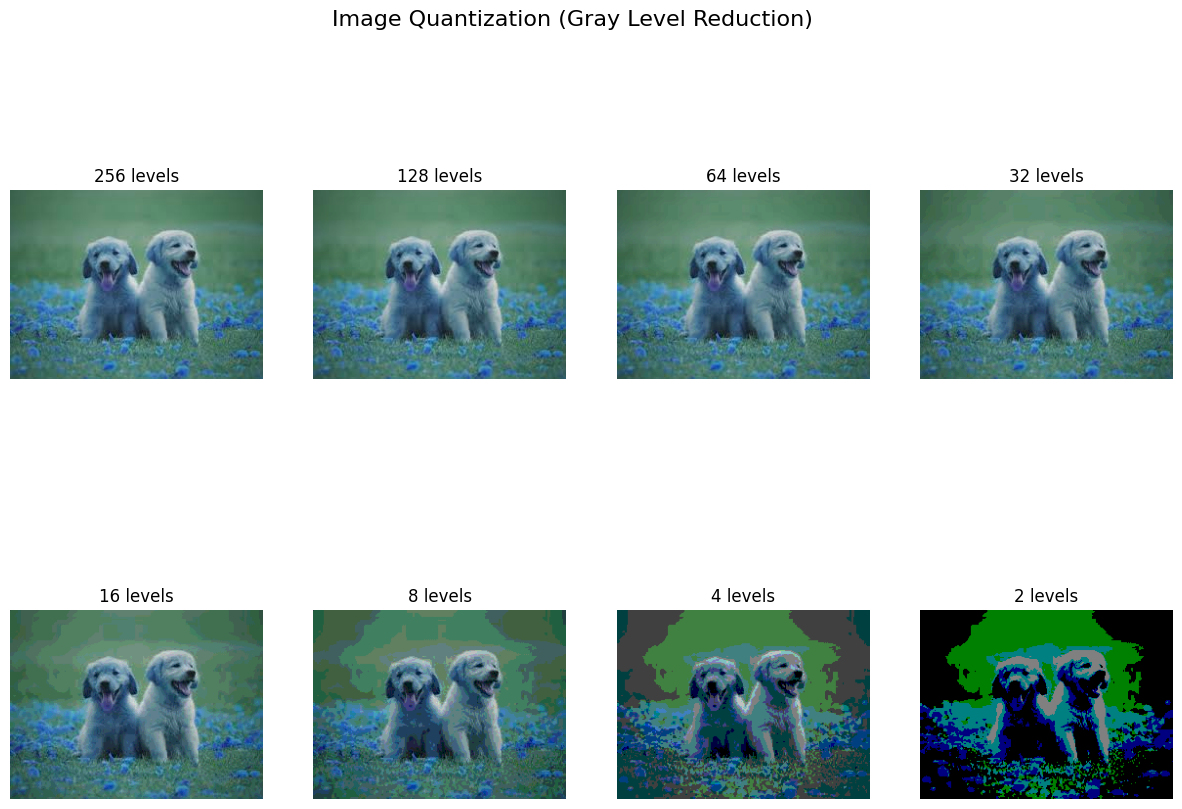

In [ ]:
#1. Function for quantization
def quantize_image(image, levels):
    # Scale pixel values to new levels
    factor = 256 // levels
    return (image // factor) * factor

#2. Different gray levels
gray_levels = [256, 128, 64, 32, 16, 8, 4, 2]

#3. Show results
plt.figure(figsize=(15,10))

for i, L in enumerate(gray_levels, 1):
    q_img = quantize_image(img, L)
    plt.subplot(2, 4, i)
    plt.imshow(q_img, cmap="gray")
    plt.title(f"{L} levels")
    plt.axis("off")

plt.suptitle("Image Quantization (Gray Level Reduction)", fontsize=16)
plt.show()
